In [3]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

import graphviz
import warnings
warnings.filterwarnings(action='ignore')


In [4]:
###1.데이터 수집&확인
uni=pd.read_excel('C:/UniversalBank.xls',sheet_name="Data",
                  names=['ID','Age','Experience','Income','ZIP Code','Family','CCAvg','Education','Mortgage',
                         'Personal_Loan','Securities_Account','CD_Account','Online','Creditcard'],header=None)
uni=uni.iloc[4:,]
uni.head() 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,Creditcard
4,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
5,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
6,3,39,15,11,94720,1,1,1,0,0,0,0,0,0
7,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
8,5,35,8,45,91330,4,1,2,0,0,0,0,0,1


In [5]:
uni.dtypes

ID                    object
Age                   object
Experience            object
Income                object
ZIP Code              object
Family                object
CCAvg                 object
Education             object
Mortgage              object
Personal_Loan         object
Securities_Account    object
CD_Account            object
Online                object
Creditcard            object
dtype: object

In [6]:
uni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 4 to 5003
Data columns (total 14 columns):
ID                    5000 non-null object
Age                   5000 non-null object
Experience            5000 non-null object
Income                5000 non-null object
ZIP Code              5000 non-null object
Family                5000 non-null object
CCAvg                 5000 non-null object
Education             5000 non-null object
Mortgage              5000 non-null object
Personal_Loan         5000 non-null object
Securities_Account    5000 non-null object
CD_Account            5000 non-null object
Online                5000 non-null object
Creditcard            5000 non-null object
dtypes: object(14)
memory usage: 547.0+ KB


In [7]:
#ZIPCode제외
uni=uni.iloc[:,[0,1,2,3,5,6,7,8,9,10,11,12,13]]
uni

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,Creditcard
4,1,25,1,49,4,1.6,1,0,0,1,0,0,0
5,2,45,19,34,3,1.5,1,0,0,1,0,0,0
6,3,39,15,11,1,1,1,0,0,0,0,0,0
7,4,35,9,100,1,2.7,2,0,0,0,0,0,0
8,5,35,8,45,4,1,2,0,0,0,0,0,1
9,6,37,13,29,4,0.4,2,155,0,0,0,1,0
10,7,53,27,72,2,1.5,2,0,0,0,0,1,0
11,8,50,24,22,1,0.3,3,0,0,0,0,0,1
12,9,35,10,81,3,0.6,2,104,0,0,0,1,0
13,10,34,9,180,1,8.9,3,0,1,0,0,0,0


In [8]:
#2.데이터 전처리:Null값과 이상치를 제거해 보세요
uni.isnull().sum()
#null값:없음

ID                    0
Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
Creditcard            0
dtype: int64

In [9]:
#plotly 이용한 시각화

import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

import matplotlib.pyplot as plt

# Create trace1 #

trace1 = go.Box(
                y = uni.Age,
                name = 'Age',
                marker = dict(color = 'rgba(255,174,255,0.5)',
                             line = dict(color='rgb(0,0,0)',width= 1.5)),
                text = uni.Personal_Loan)

trace2 = go.Box(
                y = uni.Experience,
                name = 'Experience',
                marker = dict(color = 'rgba(12,50,196,0.6)',
                             line = dict(color='rgb(0,0,0)',width= 1.5)),
                text = uni.Personal_Loan)

trace3 = go.Box(
                y = uni.Income,
                name = 'Income',
                marker = dict(color = 'rgba(255,50,156,0.4)',
                             line = dict(color='rgb(0,0,0)',width= 1.5)),
                text = uni.Personal_Loan)

trace4 = go.Box(
                y = uni.Family,
                name = 'Family',
                marker = dict(color = 'rgba(230,80,196,0.6)',
                             line = dict(color='rgb(0,0,0)',width= 1.5)),
                text = uni.Personal_Loan)

trace5 = go.Box(
                y = uni.CCAvg,
                name = 'CCAvg',
                marker = dict(color = 'rgba(110,10,196,0.6)',
                             line = dict(color='rgb(0,0,0)',width= 1.5)),
                text = uni.Personal_Loan)

trace6 = go.Box(
                y = uni.Education,
                name = 'Education',
                marker = dict(color = 'rgba(110,10,196,0.6)',
                             line = dict(color='rgb(0,0,0)',width= 1.5)),
                text = uni.Personal_Loan)

trace7 = go.Box(
                y = uni.Mortgage,
                name = 'Mortgage',
                marker = dict(color = 'rgba(110,10,196,0.6)',
                             line = dict(color='rgb(0,0,0)',width= 1.5)),
                text = uni.Personal_Loan)

trace8 = go.Box(
                y = uni.Securities_Account,
                name = 'Securities_Account',
                marker = dict(color = 'rgba(110,10,196,0.6)',
                             line = dict(color='rgb(0,0,0)',width= 1.5)),
                text = uni.Personal_Loan)

trace9 = go.Box(
                y = uni.CD_Account,
                name = 'CD_Account',
                marker = dict(color = 'rgba(110,10,196,0.6)',
                             line = dict(color='rgb(0,0,0)',width= 1.5)),
                text = uni.Personal_Loan)

trace10 = go.Box(
                y = uni.Online,
                name = 'Online',
                marker = dict(color = 'rgba(110,10,196,0.6)',
                             line = dict(color='rgb(0,0,0)',width= 1.5)),
                text = uni.Personal_Loan)

trace11 = go.Box(
                y = uni.Creditcard,
                name = 'Creditcard',
                marker = dict(color = 'rgba(110,10,196,0.6)',
                             line = dict(color='rgb(0,0,0)',width= 1.5)),
                text = uni.Personal_Loan)

data = [trace1,trace2,trace3, trace4,trace5,trace6,trace7,trace8,trace9,trace10,trace11]
iplot(data)


In [10]:
#이상치 제거
print("old : {}".format(len(uni))) 

uni=uni[(uni['Income']<=185)]
uni=uni[(uni['Mortgage']<=252)]

print("new : {}".format(len(uni))) 

old : 5000
new : 4635


In [11]:
#2.train set,test set 분리
X=uni.iloc[:,[1,2,3,4,5,6,7,9,10,11,12]]
y=uni.iloc[:,8]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

print(X.head())
print(y.head()) 


  Age Experience Income Family CCAvg Education Mortgage Securities_Account  \
4  25          1     49      4   1.6         1        0                  1   
5  45         19     34      3   1.5         1        0                  1   
6  39         15     11      1     1         1        0                  0   
7  35          9    100      1   2.7         2        0                  0   
8  35          8     45      4     1         2        0                  0   

  CD_Account Online Creditcard  
4          0      0          0  
5          0      0          0  
6          0      0          0  
7          0      0          0  
8          0      0          1  
4    0
5    0
6    0
7    0
8    0
Name: Personal_Loan, dtype: object


In [12]:
print("X_train.shape:{}".format(X_train.shape))
print("X_test.shape:{}".format(X_test.shape))
print("y_train.shape:{}".format(y_train.shape))
print("y_test.shape:{}".format(y_test.shape)) 

X_train.shape:(3708, 11)
X_test.shape:(927, 11)
y_train.shape:(3708,)
y_test.shape:(927,)


In [13]:
#scaling 4가지 시도
# scale(x) : 기본 스케일, 평균과 표준편차 사용
from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()
X_train1=scaler1.fit(X_train)
X_train1=scaler1.transform(X_train)
X_test1=scaler1.transform(X_test) 

# robust_scale(x) : 중앙값과 IQR 사용, 아웃라이어의 영향을 최소화
from sklearn.preprocessing import RobustScaler

scaler2 = RobustScaler()
X_train2=scaler2.fit(X_train)
X_train2=scaler2.transform(X_train)
X_test2=scaler2.transform(X_test)

# minmax_scale(x) : 최대/최소값이 각각 1,0이 되도록 스케일링
from sklearn.preprocessing import MinMaxScaler
scaler3=MinMaxScaler()
X_train3=scaler3.fit(X_train)
X_train3=scaler3.transform(X_train)
X_test3=scaler3.transform(X_test)

# maxabs_scale(x) : 최대절대값과 0이 각각 1,0이 되도록 스케일링
from sklearn.preprocessing import MaxAbsScaler
scaler4=MaxAbsScaler()
X_train4=scaler4.fit(X_train)
X_train4=scaler4.transform(X_train)
X_test4=scaler4.transform(X_test)

print("X_train1 :\n", X_train1)
print()
print("X_train2 :\n", X_train2)
print()
print("X_train3 :\n",X_train3) 
print()
print("X_train4 :\n",X_train4)
print()
print()
print("X_test1 :\n", X_test1)
print()
print("X_test2 :\n", X_test2)
print()
print("X_test3 :\n",X_test3) 
print()
print("X_test4 :\n",X_test4) 


X_train1 :
 [[ 0.05957606 -0.00617195 -1.27527706 ... -0.24128651  0.82330314
  -0.65364496]
 [ 1.45883517  1.47877116  0.35187778 ... -0.24128651 -1.21461945
  -0.65364496]
 [-0.37769241 -0.44291992 -1.10777582 ... -0.24128651 -1.21461945
   1.52988253]
 ...
 [-1.42713674 -1.49111506 -0.3420559  ... -0.24128651 -1.21461945
  -0.65364496]
 [-1.68949782 -1.75316384  0.06473281 ... -0.24128651  0.82330314
  -0.65364496]
 [-1.25222935 -1.31641587  0.54330777 ... -0.24128651  0.82330314
   1.52988253]]

X_train2 :
 [[ 0.05        0.         -0.88235294 ...  0.          0.
   0.        ]
 [ 0.85        0.85        0.45098039 ...  0.         -1.
   0.        ]
 [-0.2        -0.25       -0.74509804 ...  0.         -1.
   1.        ]
 ...
 [-0.8        -0.85       -0.11764706 ...  0.         -1.
   0.        ]
 [-0.95       -1.          0.21568627 ...  0.          0.
   0.        ]
 [-0.7        -0.75        0.60784314 ...  0.          0.
   1.        ]]

X_train3 :
 [[0.52272727 0.5        0.

In [14]:
y_train = pd.to_numeric(y_train)
y_train.head()

3508    0
4668    0
948     0
1620    1
2122    0
Name: Personal_Loan, dtype: int64

In [15]:
#3.분류 모델(kNN, Rogistic Regression, Decision Tree, Random Forest, Gradient Boosting Regression)을 활용
#최적의 정확도를 구해보세요.(매개변수 조절하는것 잊어 버리시면 안돼요.)

#3-1.KNN
training_accuracy1 = []

from sklearn.neighbors import KNeighborsClassifier
neighbors_settings=range(1,11)

for n_neighbors in neighbors_settings:
    clf1=KNeighborsClassifier(n_neighbors=n_neighbors)
    clf1.fit(X_train1,y_train)
    training_accuracy1.append(clf1.score(X_train1,y_train)) 
    
training_accuracy2 = []

from sklearn.neighbors import KNeighborsClassifier
neighbors_settings=range(1,11)

for n_neighbors in neighbors_settings:
    clf2=KNeighborsClassifier(n_neighbors=n_neighbors)
    clf2.fit(X_train2,y_train)
    training_accuracy2.append(clf2.score(X_train2,y_train)) 
    
training_accuracy3 = []

from sklearn.neighbors import KNeighborsClassifier
neighbors_settings=range(1,11)

for n_neighbors in neighbors_settings:
    clf3=KNeighborsClassifier(n_neighbors=n_neighbors)
    clf3.fit(X_train3,y_train)
    training_accuracy3.append(clf3.score(X_train3,y_train)) 
    
training_accuracy4 = []

from sklearn.neighbors import KNeighborsClassifier
neighbors_settings=range(1,11)

for n_neighbors in neighbors_settings:
    clf4=KNeighborsClassifier(n_neighbors=n_neighbors)
    clf4.fit(X_train4,y_train)
    training_accuracy4.append(clf4.score(X_train4,y_train)) 


In [16]:
y_test = pd.to_numeric(y_test)

test_accuracy1 = []

from sklearn.neighbors import KNeighborsClassifier
neighbors_settings=range(1,11)

for n_neighbors in neighbors_settings:
    clf1=KNeighborsClassifier(n_neighbors=n_neighbors)
    clf1.fit(X_test1,y_test)
    test_accuracy1.append(clf1.score(X_test1,y_test)) 
    
test_accuracy2 = []

from sklearn.neighbors import KNeighborsClassifier
neighbors_settings=range(1,11)

for n_neighbors in neighbors_settings:
    clf2=KNeighborsClassifier(n_neighbors=n_neighbors)
    clf2.fit(X_test2,y_test)
    test_accuracy2.append(clf2.score(X_test2,y_test)) 
    
test_accuracy3 = []

from sklearn.neighbors import KNeighborsClassifier
neighbors_settings=range(1,11)

for n_neighbors in neighbors_settings:
    clf3=KNeighborsClassifier(n_neighbors=n_neighbors)
    clf3.fit(X_test3,y_test)
    test_accuracy3.append(clf3.score(X_test3,y_test)) 
    
test_accuracy4 = []

from sklearn.neighbors import KNeighborsClassifier
neighbors_settings=range(1,11)

for n_neighbors in neighbors_settings:
    clf4=KNeighborsClassifier(n_neighbors=n_neighbors)
    clf4.fit(X_test4,y_test)
    test_accuracy4.append(clf4.score(X_test4,y_test))

In [17]:
print("training accuracy1 :\n",training_accuracy1)    
print("training accuracy2 :\n",training_accuracy2)
print("training accuracy3 :\n",training_accuracy3)  
print("training accuracy4 :\n",training_accuracy4)  

print("test accuracy1 :\n",test_accuracy1)    
print("test accuracy2 :\n",test_accuracy2)
print("test accuracy3 :\n",test_accuracy3)  
print("test accuracy4 :\n",test_accuracy4)  


training accuracy1 :
 [1.0, 0.9746494066882416, 0.9792340884573895, 0.9681769147788565, 0.9735706580366774, 0.9660194174757282, 0.9689859762675297, 0.9627831715210357, 0.9652103559870551, 0.9608953613807982]
training accuracy2 :
 [1.0, 0.9714131607335491, 0.9749190938511327, 0.964670981661273, 0.9692556634304207, 0.9635922330097088, 0.964940668824164, 0.9598166127292341, 0.9627831715210357, 0.9579288025889967]
training accuracy3 :
 [1.0, 0.9773462783171522, 0.9808522114347357, 0.9700647249190939, 0.9714131607335491, 0.9654800431499461, 0.9670981661272924, 0.9611650485436893, 0.9638619201725998, 0.959546925566343]
training accuracy4 :
 [1.0, 0.977076591154261, 0.9813915857605178, 0.9692556634304207, 0.9719525350593312, 0.9668284789644013, 0.9684466019417476, 0.9638619201725998, 0.9660194174757282, 0.9617044228694714]
test accuracy1 :
 [1.0, 0.9687162891046386, 0.9773462783171522, 0.9622437971952535, 0.9687162891046386, 0.9568500539374326, 0.9600862998921251, 0.948220064724919, 0.9503775

In [18]:
a = pd.DataFrame({'training_accuracy1': training_accuracy1,'test_accuracy1':test_accuracy1,
                  'training_accuracy2': training_accuracy2,'test_accuracy2':test_accuracy2,
                  'training_accuracy3': training_accuracy3,'test_accuracy3':test_accuracy3,
                  'training_accuracy4': training_accuracy4,'test_accuracy4':test_accuracy4})
print(a)
a.info()
a.to_csv("C:/universal_acc.csv")

   test_accuracy1  test_accuracy2  test_accuracy3  test_accuracy4  \
0        1.000000        1.000000        1.000000        1.000000   
1        0.968716        0.969795        0.967638        0.967638   
2        0.977346        0.973031        0.970874        0.977346   
3        0.962244        0.959008        0.952535        0.953614   
4        0.968716        0.965480        0.954693        0.960086   
5        0.956850        0.953614        0.951456        0.950378   
6        0.960086        0.956850        0.952535        0.953614   
7        0.948220        0.952535        0.939590        0.940669   
8        0.950378        0.956850        0.942826        0.942826   
9        0.947141        0.950378        0.939590        0.939590   

   training_accuracy1  training_accuracy2  training_accuracy3  \
0            1.000000            1.000000            1.000000   
1            0.974649            0.971413            0.977346   
2            0.979234            0.974919    

In [19]:
#3-2.Rogistic Regression
#scale1
from sklearn.linear_model import LogisticRegression
logreg1 = LogisticRegression().fit(X_train1,y_train) #default value of C =1
logreg100 = LogisticRegression(C=100).fit(X_train1,y_train) #C=100(모델의 제약을 풀어줌)
logreg001 = LogisticRegression(C=0.01).fit(X_train1,y_train)  #C=0.1(규제의 강도를 높이기 위해 C값을 낮춤)


#scale2
from sklearn.linear_model import LogisticRegression
logreg1 = LogisticRegression().fit(X_train2,y_train) #default value of C =1
logreg100 = LogisticRegression(C=100).fit(X_train2,y_train) #C=100(모델의 제약을 풀어줌)
logreg001 = LogisticRegression(C=0.01).fit(X_train2,y_train)  #C=0.1(규제의 강도를 높이기 위해 C값을 낮춤)


#scale3
from sklearn.linear_model import LogisticRegression
logreg1 = LogisticRegression().fit(X_train3,y_train) #default value of C =1
logreg100 = LogisticRegression(C=100).fit(X_train3,y_train) #C=100(모델의 제약을 풀어줌)
logreg001 = LogisticRegression(C=0.01).fit(X_train3,y_train)  #C=0.1(규제의 강도를 높이기 위해 C값을 낮춤)


#scale4
from sklearn.linear_model import LogisticRegression
logreg1 = LogisticRegression().fit(X_train4,y_train) #default value of C =1
logreg100 = LogisticRegression(C=100).fit(X_train4,y_train) #C=100(모델의 제약을 풀어줌)
logreg001 = LogisticRegression(C=0.01).fit(X_train4,y_train)  #C=0.1(규제의 강도를 높이기 위해 C값을 낮춤)


print("train set score1 : {}".format(logreg1.score(X_train1,y_train)))
print("test set score1 : {}".format(logreg1.score(X_test1,y_test))) 
print("train set score100 : {}".format(logreg100.score(X_train1,y_train)))
print("test set score100 : {}".format(logreg100.score(X_test1,y_test))) 
print("train set score001 : {}".format(logreg001.score(X_train1,y_train)))
print("test set score001 : {}".format(logreg001.score(X_test1,y_test)))
print()
print("train set score12 : {}".format(logreg1.score(X_train2,y_train)))
print("test set score12 : {}".format(logreg1.score(X_test2,y_test))) 
print("train set score1002 : {}".format(logreg100.score(X_train2,y_train)))
print("test set score1002 : {}".format(logreg100.score(X_test2,y_test))) 
print("train set score0012 : {}".format(logreg001.score(X_train2,y_train)))
print("test set score0012 : {}".format(logreg001.score(X_test2,y_test))) 
print()
print("train set score13 : {}".format(logreg1.score(X_train3,y_train)))
print("test set score13 : {}".format(logreg1.score(X_test3,y_test))) 
print("train set score1003 : {}".format(logreg100.score(X_train3,y_train)))
print("test set score1003 : {}".format(logreg100.score(X_test3,y_test))) 
print("train set score0013 : {}".format(logreg001.score(X_train3,y_train)))
print("test set score0013 : {}".format(logreg001.score(X_test3,y_test))) 
print()
print("train set score14 : {}".format(logreg1.score(X_train4,y_train)))
print("test set score14 : {}".format(logreg1.score(X_test4,y_test))) 
print("train set score1004 : {}".format(logreg100.score(X_train4,y_train)))
print("test set score1004 : {}".format(logreg100.score(X_test4,y_test))) 
print("train set score0014 : {}".format(logreg001.score(X_train4,y_train)))
print("test set score0014 : {}".format(logreg001.score(X_test4,y_test))) 


train set score1 : 0.895091693635383
test set score1 : 0.8878101402373247
train set score100 : 0.9010248112189859
test set score100 : 0.8921251348435815
train set score001 : 0.7866774541531824
test set score001 : 0.7713052858683926

train set score12 : 0.895361380798274
test set score12 : 0.8942826321467098
train set score1002 : 0.8980582524271845
test set score1002 : 0.8932038834951457
train set score0012 : 0.86084142394822
test set score0012 : 0.8511326860841424

train set score13 : 0.9563106796116505
test set score13 : 0.9600862998921251
train set score1003 : 0.9600862998921251
test set score1003 : 0.9644012944983819
train set score0013 : 0.9215210355987055
test set score0013 : 0.9288025889967637

train set score14 : 0.9571197411003236
test set score14 : 0.9546925566343042
train set score1004 : 0.9587378640776699
test set score1004 : 0.9600862998921251
train set score0014 : 0.9215210355987055
test set score0014 : 0.9288025889967637


In [20]:
#3-3.Decision Tree
from sklearn.tree import DecisionTreeClassifier

#default value of Decision Tree
tree = DecisionTreeClassifier(random_state=0)

tree.fit(X_train,y_train)
print("train score1 : {}".format(tree.score(X_train,y_train)))
print("test score1 : {}".format(tree.score(X_test,y_test)))

#나무의 깊이를 4로 --> 질문을 4개로
tree2 = DecisionTreeClassifier(max_depth=4, random_state=0)

tree2.fit(X_train,y_train)

print("train score2 : {}".format(tree2.score(X_train,y_train)))
print("test score2 : {}".format(tree2.score(X_test,y_test)))

# 노드의 최대 개수를 10로 
tree3 = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

tree3.fit(X_train,y_train)
print("train score3 : {}".format(tree3.score(X_train,y_train)))
print("test score3 : {}".format(tree3.score(X_test,y_test)))

# 데이터 포인트 최소 개수를 4로 
tree4 = DecisionTreeClassifier(min_samples_leaf=4, random_state=0)
tree4.fit(X_train,y_train)

print("train score4 : {}".format(tree4.score(X_train,y_train)))
print("test score4 : {}".format(tree4.score(X_test,y_test))) 


train score1 : 1.0
test score1 : 0.982740021574973
train score2 : 0.9870550161812298
test score2 : 0.9773462783171522
train score3 : 0.9865156418554477
test score3 : 0.9773462783171522
train score4 : 0.9913700107874865
test score4 : 0.9805825242718447


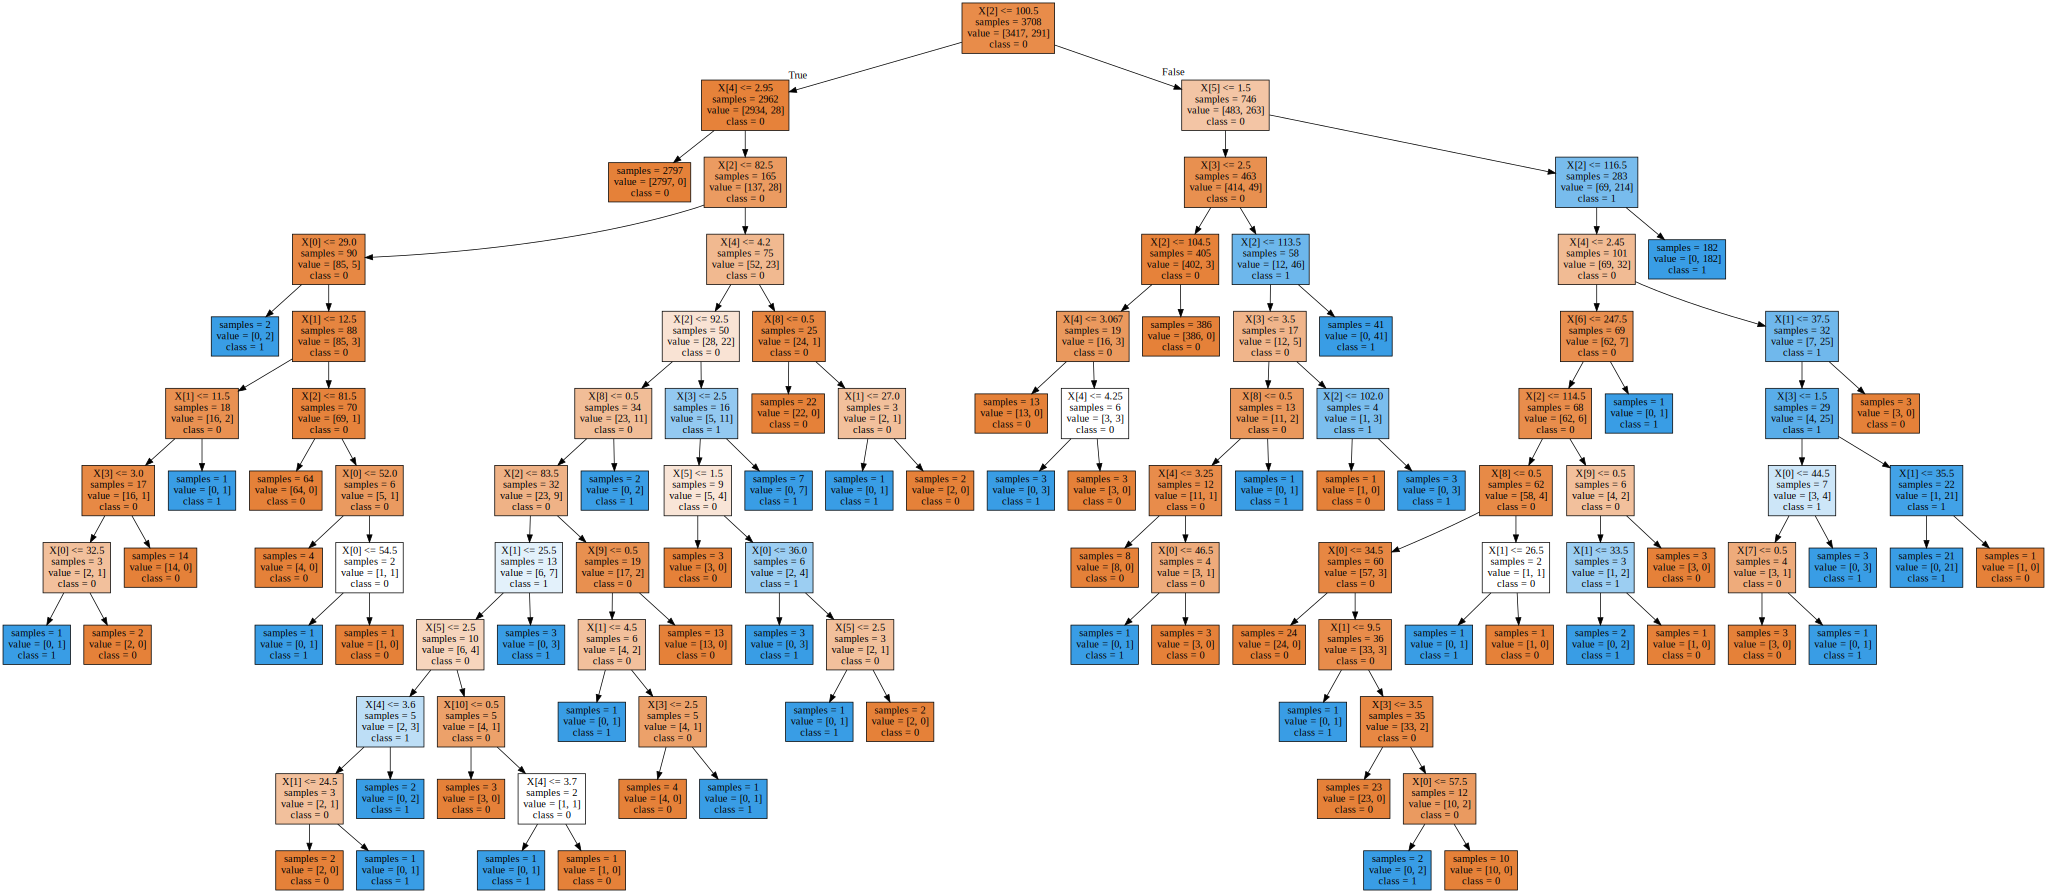

In [21]:
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file="tree.dot",class_names=['0','1'],
                impurity = False, filled = True)

#graphviz #

import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph)) 

In [22]:
# 트리의 특성 중요도(feature importance) #
# sum(feature importance) = 1 #

print("feature 
print("feature importance : {}".format(tree.feature_importances_))
print("feature importance : {}".format(np.sum(tree.feature_importances_ != 0))) 

feature importance : [0.02786411 0.03234696 0.42388032 0.13310811 0.07824578 0.28432293
 0.00305511 0.00279681 0.00907411 0.00418704 0.00111872]
feature importance : 11


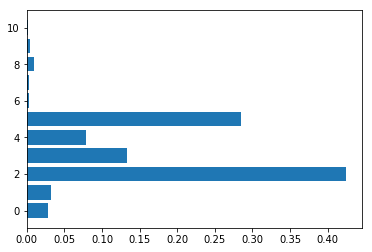

In [23]:

def plot_feature_importances_uni(tree):
    n_features = 11
    plt.barh(np.arange(n_features),tree.feature_importances_, align ='center')

plot_feature_importances_uni(tree) 


In [24]:
tree.feature_importances_

array([0.02786411, 0.03234696, 0.42388032, 0.13310811, 0.07824578,
       0.28432293, 0.00305511, 0.00279681, 0.00907411, 0.00418704,
       0.00111872])

In [25]:
#4.Random Forest
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 100, random_state=0)
forest.fit(X_train,y_train)

print("train accuracy : {}".format(forest.score(X_train,y_train)))
print("test accuracy : {}".format(forest.score(X_test,y_test)))  


train accuracy : 1.0
test accuracy : 0.9795037756202805


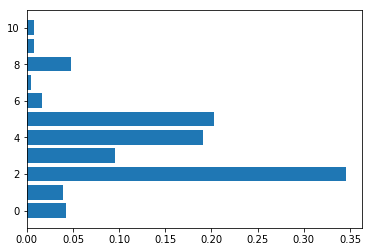

In [26]:
plot_feature_importances_uni(forest) 

In [27]:
#5.Gradient Boosting Regression
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,y_train)

print("train accuracy : {}".format(gbrt.score(X_train,y_train)))
print("test accuracy : {}".format(gbrt.score(X_test,y_test))) 

train accuracy : 0.9964940668824164
test accuracy : 0.982740021574973


In [28]:
#5-1.트리의 최대 깊이를 줄이기
gbrt = GradientBoostingClassifier(random_state=0,max_depth=1)
gbrt.fit(X_train,y_train)

print("train accuracy : {}".format(gbrt.score(X_train,y_train)))
print("test accuracy : {}".format(gbrt.score(X_test,y_test)))


train accuracy : 0.970873786407767
test accuracy : 0.9697950377562028


In [29]:
#5-2.학습률 낮추기
gbrt = GradientBoostingClassifier(random_state=0,learning_rate=0.01)
gbrt.fit(X_train,y_train)

print("train accuracy : {}".format(gbrt.score(X_train,y_train)))
print("test accuracy : {}".format(gbrt.score(X_test,y_test))) 

train accuracy : 0.9816612729234089
test accuracy : 0.9805825242718447


In [30]:
#5-3.최대 깊이 줄이기&학습률 낮추기
gbrt = GradientBoostingClassifier(random_state=0,learning_rate=0.01,max_depth=1)
gbrt.fit(X_train,y_train)

print("train accuracy : {}".format(gbrt.score(X_train,y_train)))
print("test accuracy : {}".format(gbrt.score(X_test,y_test))) 

train accuracy : 0.9215210355987055
test accuracy : 0.9288025889967637


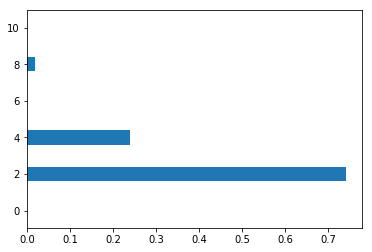

In [31]:
plot_feature_importances_uni(gbrt)

In [32]:
# grid search #

train_accuracy = []
test_accuracy = []

for learning_rate in np.arange(0.1,0.9,0.01):
    for max_depth in np.arange(1,5,1):
        gbrt = GradientBoostingClassifier(random_state=0,learning_rate=learning_rate,max_depth=max_depth)
        gbrt.fit(X_train,y_train)
        
        train_accuracy.append(gbrt.score(X_train,y_train))
        test_accuracy.append(gbrt.score(X_test,y_test))
        

In [33]:
train_accuracy = pd.DataFrame({'index' : np.arange(1,len(train_accuracy)+1,1),'accuracy' : train_accuracy})
train_accuracy

,accuracy,index
0,0.970874,1
1,0.990291,2
2,0.996494,3
3,1.000000,4
4,0.973031,5
5,0.991370,6
6,0.996494,7
7,1.000000,8
8,0.973031,9
9,0.990561,10


In [34]:
test_accuracy = pd.DataFrame({'index' : np.arange(1,len(test_accuracy)+1,1),'accuracy' : test_accuracy})
test_accuracy

,accuracy,index
0,0.969795,1
1,0.980583,2
2,0.982740,3
3,0.981661,4
4,0.970874,5
5,0.980583,6
6,0.983819,7
7,0.981661,8
8,0.970874,9
9,0.981661,10


In [35]:
train_accuracy.to_csv("C:/train_acc.csv") 
test_accuracy.to_csv("C:/test_acc.csv")